# Modeling: Tessellation of two bodies

This example shows how to create two stacked bodies and return the tessellation
as two merged bodies.

## Perform required imports

Perform the required imports.

In [1]:
from pint import Quantity

from ansys.geometry.core import Modeler
from ansys.geometry.core.math import Point2D, Point3D, Plane
from ansys.geometry.core.misc import UNITS
from ansys.geometry.core.plotting import Plotter
from ansys.geometry.core.sketch import Sketch


## Create design

Create the basic sketches to be tessellated and extrude the sketch in the
required plane. For more information on creating a component and extruding a
sketch in the design, see the [Rectangular plate with multiple bodies](plate_with_hole.mystnb)
example.

Here is a typical situation in which two bodies, with different sketch planes,
merge each body into a single dataset. This effectively combines all the faces
of each individual body into a single dataset without separating faces.

In [2]:
modeler = Modeler()

sketch_1 = Sketch()
box = sketch_1.box(
    Point2D([10, 10], unit=UNITS.m), width=Quantity(10, UNITS.m), height=Quantity(5, UNITS.m)
)
circle = sketch_1.circle(
    Point2D([0, 0], unit=UNITS.m), radius=Quantity(25, UNITS.m)
)

design = modeler.create_design("TessellationDesign")
comp = design.add_component("TessellationComponent")
body = comp.extrude_sketch("Body", sketch=sketch_1, distance=10 * UNITS.m)

# Create the second body in a plane with a different origin
sketch_2 = Sketch(Plane([0, 0, 10]))
box = sketch_2.box(Point2D(
    [10, 10], unit=UNITS.m), width=Quantity(10, UNITS.m), height=Quantity(5, UNITS.m)
)
circle = sketch_2.circle(
    Point2D([0, 10], unit=UNITS.m), radius=Quantity(25, UNITS.m)
)

body = comp.extrude_sketch("Body", sketch=sketch_2, distance=10 * UNITS.m)

## Tessellate component as two merged bodies

Tessellate the component and merge each body into a single dataset. This effectively
combines all the faces of each individual body into a single dataset without
separating faces.

In [3]:
dataset = comp.tessellate(merge_bodies=True)
dataset

MultiBlock (0x1f62376a520)
  N Blocks    1
  X Bounds    -25.000, 25.000
  Y Bounds    -24.999, 34.999
  Z Bounds    0.000, 20.000

If you want to tessellate the body and return the geometry as triangles, single body tessellation
is possible. If you want to merge the individual faces of the tessellation, enable the
``merge`` option so that the body is rendered into a single mesh. This preserves the number of
triangles and only merges the topology.

**Code without merging the body**

In [4]:
dataset = body.tessellate()
dataset

MultiBlock (0x1f62376aca0)
  N Blocks    7
  X Bounds    -25.000, 25.000
  Y Bounds    -14.999, 34.999
  Z Bounds    10.000, 20.000

**Code with merging the body**

In [5]:
mesh = body.tessellate(merge=True)
mesh

PolyData,Information
N Cells,1640
N Points,1650
N Strips,0
X Bounds,"-2.500e+01, 2.500e+01"
Y Bounds,"-1.500e+01, 3.500e+01"
Z Bounds,"1.000e+01, 2.000e+01"
N Arrays,0


## Plot design

Plot the design.

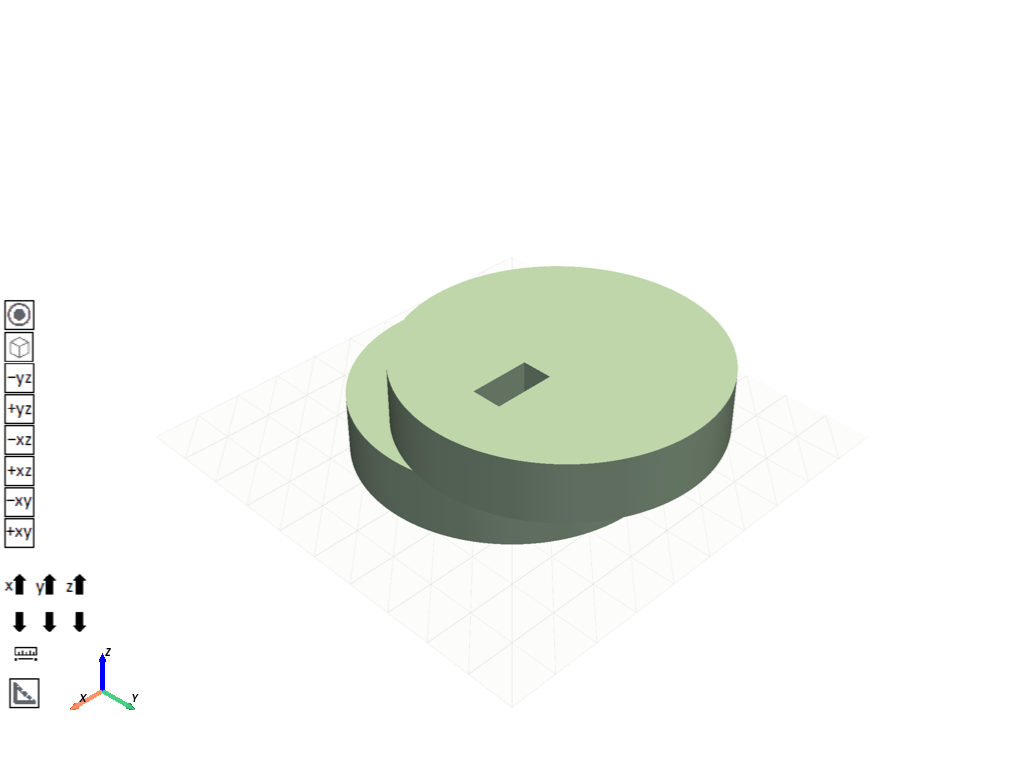

In [6]:
design.plot()